In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00021531_L1G_PS/0-Pusan-2023-AO_20_K3A_20230523045050_45040_00021531_L1G_PS.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00021531_L1G_PS/K3A_20230523045050_45040_00021531_L1G_PRGB.tif"

#------ Coordinates filtering function
args.txt_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00021531_L1G_PS/1RCoordinate.txt"

args.xml_path = None


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0130.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0130_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0130_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0130.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0130.csv")
args.csv_output_scatter = args.img_path.replace(".png","_scatter_v1_0130.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20230523045050_45040_00021531_L1G_PS
time :  2023 5 23 13 50
202305231300_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202305231300_dynamic.csv
#------------------ : csv exists


In [14]:
# # get time

# from PIL import Image
# from PIL.TiffTags import TAGS

# with Image.open(args.tf_path ) as img:
#     meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}

# import rasterio
# meta_dict_r = rasterio.open(args.tf_path)

In [15]:
# '''
# raterio 로, tif 에서 spatial-resolution 찾는 방법
# 아니면 그냥 xml 들어가서 "gsd" 로 키워드 찾으면 나온다. 


# Metadata:
  
#   TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)

# '''

# meta_dict_r.res



In [2]:
from datetime import datetime

# Your input string
input_string =  str(args.year_) + str(args.month_) + str(args.day_) + str(args.hour_) +  str(args.min)

# Specify the format of the input string
input_format = "%Y%m%d%H%M"

# Convert the string to a datetime object
datetime_object = datetime.strptime(input_string, input_format)

# Now you have a datetime object, and you can work with it as needed
print(datetime_object)


2023-05-23 13:50:00


In [3]:
input_string

'202305231350'

In [4]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (988472000 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [5]:
img_.size

(31480, 31400)

In [6]:
!nvidia-smi

Tue Jul 30 14:38:22 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:3B:00.0 Off |                  N/A |
|  0%   28C    P8    29W / 350W |      6MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:5E:00.0 Off |                  N/A |
|  0%   

# 1. Model Inference

In [8]:
import aPack_model

#0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS

if args.model_test:
    result = aPack_model.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [9]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [10]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-05-23 13:45:00
now :  2023-05-23 13:50:00
late :  2023-05-23 13:55:00


In [11]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [12]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [13]:
df

mmsi_                 time        long        lat  heading_  turn_  \
0      440005700  2023-05-23 13:00:00  129.051142  35.107152        59 -128.0   
1      440154850  2023-05-23 13:00:00  129.181417  35.042105       511 -128.0   
2      440044920  2023-05-23 13:00:00  129.050687  35.119765       511 -128.0   
3      440152080  2023-05-23 13:00:00  129.102380  35.084563       511 -128.0   
4      440101370  2023-05-23 13:00:00  129.051283  35.122367        29    0.0   
...          ...                  ...         ...        ...       ...    ...   
39331  440101100  2023-05-23 13:59:58  129.026090  35.086865       511 -128.0   
39332  440152550  2023-05-23 13:59:59  129.099278  35.054523       511 -128.0   
39333  440063450  2023-05-23 13:59:59  129.053487  35.121593       511 -128.0   
39334  441089000  2023-05-23 13:59:59  129.256915  35.011073        30    0.0   
39335  440154960  2023-05-23 13:59:59  129.020745  35.016378        64    1.0   

       speed_  
0         0.0  
1         6.9  
2         0.2  
3        10.8  
4         0.0  
...       ...  
39331     0.0  
39332    13.3  
39333     0.0  
39334    12.1  
39335     8.4  

[39336 rows x 7 columns]

In [14]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [15]:
t_df

mmsi_                 time        long        lat  heading_  turn_  \
29740  273243200  2023-05-23 13:45:01  129.066167  35.097450         0 -128.0   
29741  305784000  2023-05-23 13:45:01  128.998360  34.820653       253    0.0   
29742  440152080  2023-05-23 13:45:01  129.051060  35.119658       511 -128.0   
29743  440121630  2023-05-23 13:45:01  129.038898  35.098587       511 -128.0   
29744  440102050  2023-05-23 13:45:01  129.050102  35.120947       511 -128.0   
...          ...                  ...         ...        ...       ...    ...   
36162  567521000  2023-05-23 13:54:59  128.803333  34.914333       125    0.0   
36163  440108520  2023-05-23 13:54:59  129.078640  35.083323       511 -128.0   
36164  440101100  2023-05-23 13:54:59  129.026057  35.086857       511 -128.0   
36165  441425000  2023-05-23 13:54:59  129.321622  35.148488       200    0.0   
36166  440019260  2023-05-23 13:54:59  129.183155  35.073705       511 -128.0   

       speed_            datetime  
29740     0.0 2023-05-23 13:45:01  
29741     5.3 2023-05-23 13:45:01  
29742     0.1 2023-05-23 13:45:01  
29743     0.1 2023-05-23 13:45:01  
29744     0.0 2023-05-23 13:45:01  
...       ...                 ...  
36162     0.0 2023-05-23 13:54:59  
36163     0.0 2023-05-23 13:54:59  
36164     0.0 2023-05-23 13:54:59  
36165     9.8 2023-05-23 13:54:59  
36166     8.0 2023-05-23 13:54:59  

[6427 rows x 8 columns]

# 3. Coordinates filtering


In [16]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

129.111748 129.301289 35.054916 35.132887


# 3.1 공간해상도 구하기

- (max_long - min_long) / image_size of x 

In [17]:
x_max , y_max = img_.size

In [18]:
max_long - min_long

0.1895409999999913

In [19]:
# pixel 당 2.19 long
(max_long - min_long) / x_max

6.020997458703663e-06

In [20]:
# pixel 당 1.12 lat 
(max_lat - min_lat) / y_max

2.483152866241975e-06

In [21]:
import math

def measure(lat1, lon1, lat2, lon2):
    # Radius of Earth in KM
    R = 6378.137
    
    # Convert degrees to radians
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon/2) * math.sin(dLon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    
    # Convert distance to meters
    return d * 1000

In [22]:
a_ = measure(20,max_long, 20, min_long)
print(a_)
meter_per_pixel = a_ / x_max
print(meter_per_pixel)

19827.14450979558
0.6298330530430616


In [36]:
# def measure_lat_lon_meter(lat1, lon1, lat2, lon2):
#     ar R = 6378.137; // Radius of earth in KM
#     var dLat = lat2 * Math.PI / 180 - lat1 * Math.PI / 180;
#     var dLon = lon2 * Math.PI / 180 - lon1 * Math.PI / 180;
#     var a = Math.sin(dLat/2) * Math.sin(dLat/2) +
#     Math.cos(lat1 * Math.PI / 180) * Math.cos(lat2 * Math.PI / 180) *
#     Math.sin(dLon/2) * Math.sin(dLon/2);
#     var c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a));
#     var d = R * c;

In [23]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [24]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
29764  441300000  2023-05-23 13:45:03  129.155883  35.079317       259    0.0   
29765  440100560  2023-05-23 13:45:03  129.289997  35.091473       511 -128.0   
29769  440104360  2023-05-23 13:45:04  129.130083  35.062617       511 -128.0   
29774  440152550  2023-05-23 13:45:04  129.156100  35.075440       511 -128.0   
29784  440111830  2023-05-23 13:45:05  129.226035  35.067350       511 -128.0   
...          ...                  ...         ...        ...       ...    ...   
36104  440152550  2023-05-23 13:54:52  129.117117  35.064308       511 -128.0   
36146  440104360  2023-05-23 13:54:57  129.146155  35.076152       511 -128.0   
36149  440064970  2023-05-23 13:54:58  129.183662  35.153630       511 -128.0   
36155  440130640  2023-05-23 13:54:58  129.189588  35.129973       511 -128.0   
36166  440019260  2023-05-23 13:54:59  129.183155  35.073705       511 -128.0   

       speed_            datetime  
29764    10.5 2023-05-23 13:45:03  
29765     7.2 2023-05-23 13:45:03  
29769     6.4 2023-05-23 13:45:04  
29774    11.3 2023-05-23 13:45:04  
29784    13.2 2023-05-23 13:45:05  
...       ...                 ...  
36104    12.3 2023-05-23 13:54:52  
36146     8.1 2023-05-23 13:54:57  
36149    14.1 2023-05-23 13:54:58  
36155    10.5 2023-05-23 13:54:58  
36166     8.0 2023-05-23 13:54:59  

[419 rows x 8 columns]

In [25]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


/tmp/ipykernel_2745465/3391268297.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/tmp/ipykernel_2745465/3391268297.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/tmp/ipykernel_2745465/3391268297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_

In [40]:
# # remove duplicate row 
# [i[1:-1] for i in q_df['time']]
# # pd.to_datetime( )

In [26]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0    441300000  2023-05-23 13:45:03  129.155883  35.079317       259    0.0   
1    440100560  2023-05-23 13:45:03  129.289997  35.091473       511 -128.0   
2    440104360  2023-05-23 13:45:04  129.130083  35.062617       511 -128.0   
3    440152550  2023-05-23 13:45:04  129.156100  35.075440       511 -128.0   
4    440111830  2023-05-23 13:45:05  129.226035  35.067350       511 -128.0   
..         ...                  ...         ...        ...       ...    ...   
414  440152550  2023-05-23 13:54:52  129.117117  35.064308       511 -128.0   
415  440104360  2023-05-23 13:54:57  129.146155  35.076152       511 -128.0   
416  440064970  2023-05-23 13:54:58  129.183662  35.153630       511 -128.0   
417  440130640  2023-05-23 13:54:58  129.189588  35.129973       511 -128.0   
418  440019260  2023-05-23 13:54:59  129.183155  35.073705       511 -128.0   

     speed_            datetime  \
0      10.5 2023-05-23 13:45:03   
1       7.2 2023-05-23 13:45:03   
2       6.4 2023-05-23 13:45:04   
3      11.3 2023-05-23 13:45:04   
4      13.2 2023-05-23 13:45:05   
..      ...                 ...   
414    12.3 2023-05-23 13:54:52   
415     8.1 2023-05-23 13:54:57   
416    14.1 2023-05-23 13:54:58   
417    10.5 2023-05-23 13:54:58   
418     8.0 2023-05-23 13:54:59   

                                           utm_array          pixels  
0    (514210.84778745676, 3881850.1859596064, 52, N)   (18643, 7326)  
1     (526433.2617527157, 3883225.6059676586, 52, N)  (16143, 29549)  
2     (511861.2426496503, 3879994.8228283864, 52, N)   (22017, 3054)  
3      (514231.303469219, 3881420.2663119975, 52, N)   (19425, 7363)  
4     (520609.1712850066, 3880535.3213680824, 52, N)  (21034, 18959)  
..                                               ...             ...  
414  (510678.75458021305, 3880180.8852536143, 52, N)    (21678, 904)  
415   (513324.52262579236, 3881497.851200299, 52, N)   (19284, 5715)  
416   (516728.0865004983, 3890095.7006792347, 52, N)   (3652, 11903)  
417   (517272.82901502366, 3887473.175219088, 52, N)   (8420, 12893)  
418    (516698.2061190522, 3881232.055050007, 52, N)  (19767, 11849)  

[419 rows x 10 columns]

In [27]:
q_df.to_csv(args.csv_output_scatter,index=False)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (988472000 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


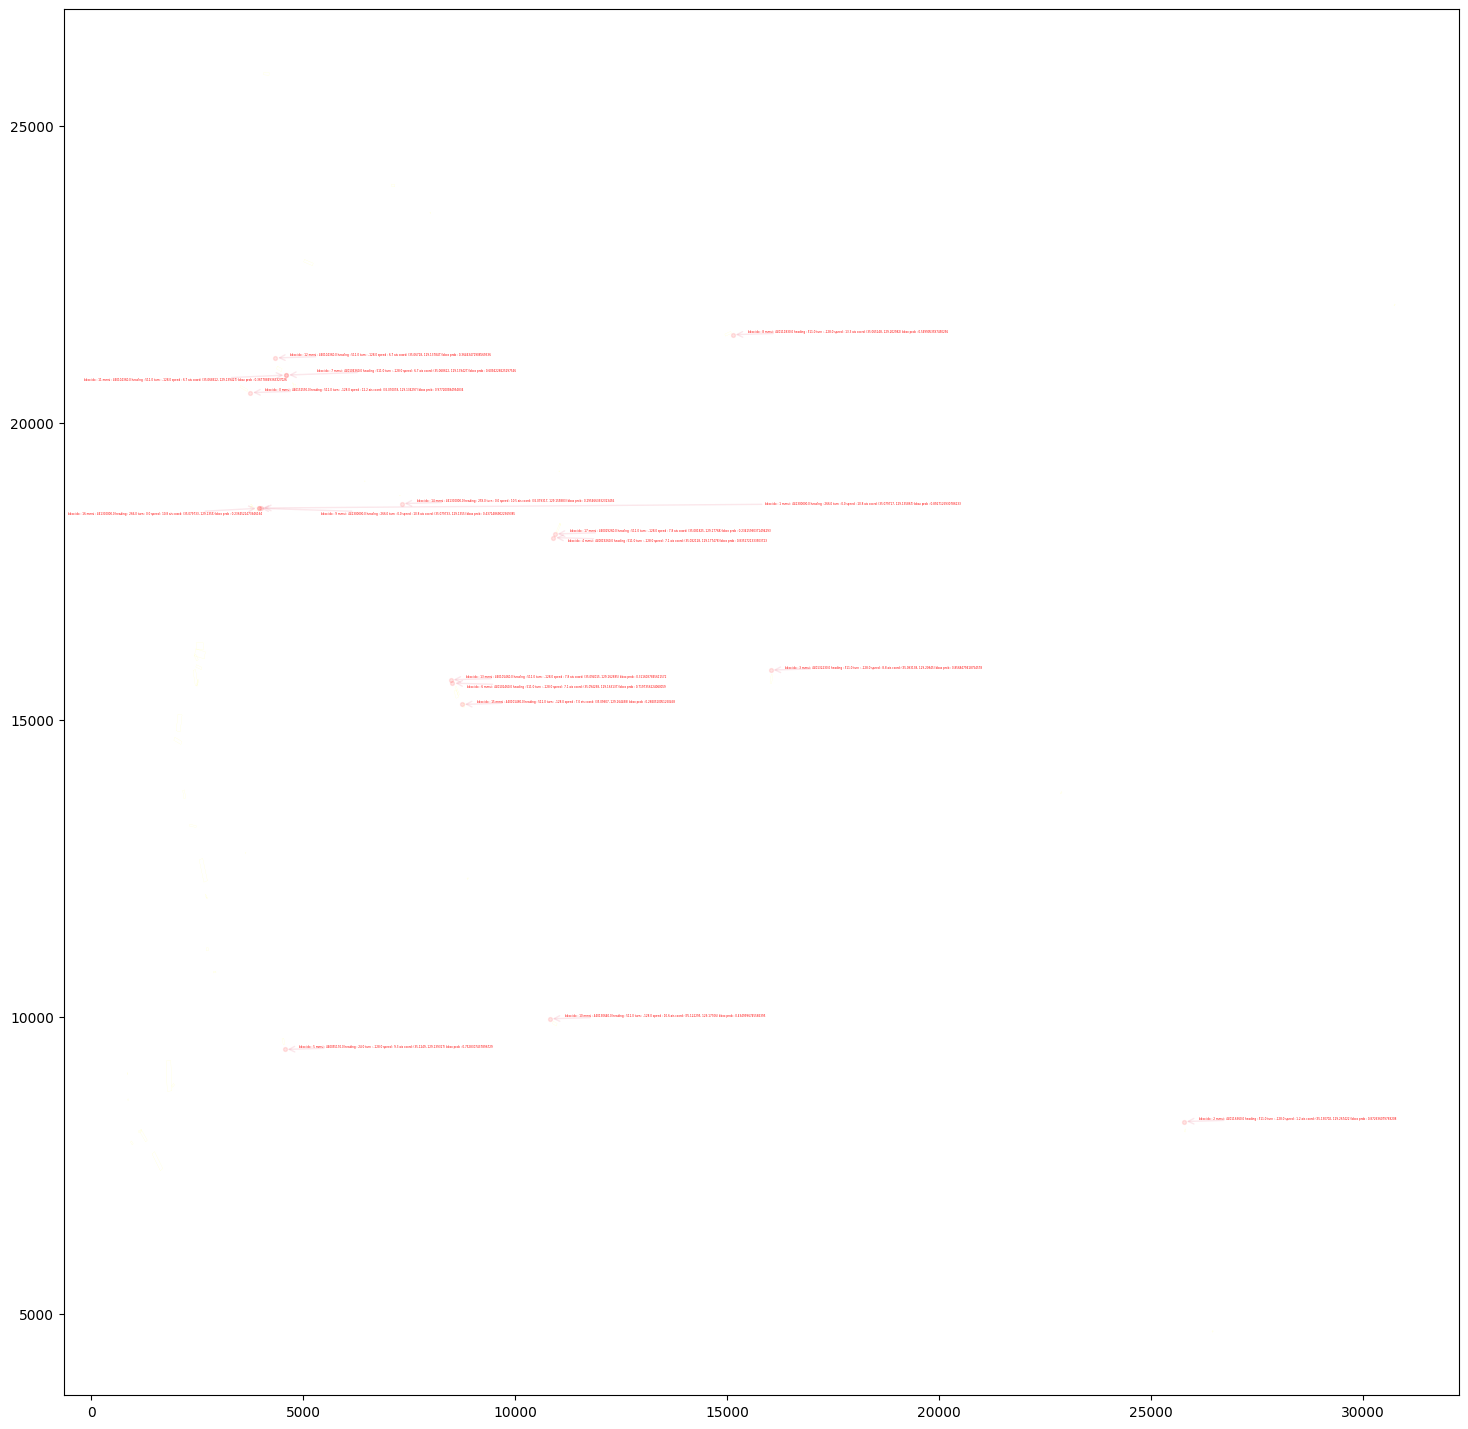

In [28]:
#------------------------------

# Code Backup ! 

#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
# debugged by Eric 
time_ais = [i for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        'bbox prob' : [],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])
        S_['bbox prob'].append(box_[5])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    plt.savefig(args.img_output,dpi =1200 )
    plt.show()

# Code Backup ! 

In [29]:
M_

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0           0   3599.890137  20581.031250  186.868088    35.925919   
1           4   3849.363281  18558.515625  199.199326    44.064297   
2           5  25813.296875   8092.152832   51.718273    16.984535   
3           7  16050.261719  15691.180664  149.506973    39.538895   
4           8  11025.121094  18231.333984  164.990036    30.775673   
5          12   4535.546875   9589.789062  104.751633    42.211746   
6          13   8613.365234  15437.510742  131.055817    61.008537   
7          16   4796.750977  20622.435547   65.941231    49.533623   
8          18  15027.531250  21501.246094  147.792603    37.972275   
9          23   3794.391357  18602.357422   37.036858    15.437199   
10         24  10939.438477   9890.346680   98.126892    46.959858   
11         29   4758.479980  20664.568359   28.269051    17.089632   
12         30   4437.677734  20909.414062  121.050888    52.460583   
13         38   8635.338867  15492.907227  158.386230    31.844809   
14         43   7281.983887  18777.480469   19.541071     8.198781   
15         45   8788.069336  15249.392578   64.587990    41.997314   
16         50   3772.684814  18627.439453   25.063793     9.207772   
17         51  11058.190430  18293.779297   31.518036    12.404265   
18          1    957.206848   7882.529297   63.180214    30.966908   
19          2   5125.469238  22699.511719  218.620590    44.966572   
20          3   2538.330811  15889.689453  136.474411    42.357159   
21          6   2457.363281  15714.741211  261.895325    61.309444   
22          9   2506.279297  15625.635742  111.407532    22.566284   
23         10    851.878540   9050.205078   29.745382    10.947246   
24         11   7123.760254  23996.748047   81.333527    39.808208   
25         14   2562.873291  16244.245117  159.355682   119.058075   
26         15    869.345886   8610.242188   25.667536    14.866991   
27         17  11045.660156  19186.867188   20.086212     9.113806   
28         19   2564.071533  16114.167969  234.781815   120.448921   
29         20   3640.857666  12764.192383   19.296715     9.657768   
30         21   1232.230225   8001.824707  225.113892    49.047253   
31         22   2191.466797  13751.342773  140.065765    43.292747   
32         25   1150.466309   8081.617188   74.094162    32.553936   
33         26  30755.068359  21986.183594   32.202103    14.630180   
34         27   7570.392090  18409.802734   20.978483    15.048300   
35         28   1930.701660   8851.039062   60.358780    33.516510   
36         31   7999.868164  23536.931641   21.986746    10.999839   
37         32   2395.271973  13218.625000  158.420273    31.003204   
38         33   2042.590088  14649.841797  181.947708    55.846073   
39         34   1834.289062   9010.229492  509.196472   108.826469   
40         35   6452.842285  19019.320312   17.531755     9.018176   
41         36   2729.442627  12005.116211   24.776529    16.721533   
42         37   2072.733154  14951.973633  284.956268    96.638573   
43         39   2705.970947  12039.060547   53.118629    18.691916   
44         40   1560.483398   7575.644531  344.069366    70.555466   
45         41   2736.922363  11140.132812   54.754711    48.469379   
46         42  26461.429688   4710.584473   28.415146    15.081006   
47         44   4133.470215  25877.853516  122.915024    44.661510   
48         46   8881.569336  12331.822266   32.194023    13.785784   
49         47   2476.537842  16050.841797  106.402397    44.255993   
50         48   2910.537842  10758.715820   62.821312    26.543133   
51         49  22888.941406  13775.865234   42.968163    15.390750   
52         52   2643.156982  12471.237305  391.207336    87.641357   

    bbox angle  bbox prob         mmsi  heading   turn  speed  \
0    -0.388373   0.977201  440152550.0    511.0 -128.0   12.2   
1    -0.229128   0.892713  441300000.0    266.0    0.0   10.8   
2     1.255820   0.872636  4

In [30]:
M_.iloc[0]['ais time']

'2023-05-23 13:50:28'

In [31]:
M_.to_csv(args.csv_output)
M_[0:10]

box index  bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0          0   3599.890137  20581.031250  186.868088    35.925919   -0.388373   
1          4   3849.363281  18558.515625  199.199326    44.064297   -0.229128   
2          5  25813.296875   8092.152832   51.718273    16.984535    1.255820   
3          7  16050.261719  15691.180664  149.506973    39.538895    1.382657   
4          8  11025.121094  18231.333984  164.990036    30.775673    1.037709   
5         12   4535.546875   9589.789062  104.751633    42.211746   -1.274804   
6         13   8613.365234  15437.510742  131.055817    61.008537   -1.198541   
7         16   4796.750977  20622.435547   65.941231    49.533623    0.059039   
8         18  15027.531250  21501.246094  147.792603    37.972275    0.308788   
9         23   3794.391357  18602.357422   37.036858    15.437199    0.378652   

   bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0   0.977201  440152550.0    511.0 -128.0   12.2                3751   
1   0.892713  441300000.0    266.0    0.0   10.8                4008   
2   0.872636  440116360.0    511.0 -128.0    1.2               25786   
3   0.856848  440132230.0    511.0 -128.0    8.8               16033   
4   0.835272  440019260.0    511.0 -128.0    7.1               10904   
5   0.752831  440055170.0     24.0 -128.0    9.3                4567   
6   0.719736  440101460.0    511.0 -128.0    7.1                8524   
7   0.609423  440104360.0    511.0 -128.0    6.7                4601   
8   0.549905  440111830.0    511.0 -128.0   13.3               15139   
9   0.437149  441300000.0    266.0    0.0   10.8                3947   

   ais y coord(pixel)    ais lat    ais long             ais time  
0               20511  35.070078  129.134297  2023-05-23 13:50:28  
1               18568  35.079717  129.135867  2023-05-23 13:50:33  
2                8243  35.130702  129.267422  2023-05-23 13:45:34  
3               15841  35.093138  129.208450  2023-05-23 13:50:30  
4               18071  35.082128  129.177478  2023-05-23 13:50:19  
5                9456  35.124900  129.139317  2023-05-23 13:51:09  
6               15621  35.094298  129.163137  2023-05-23 13:49:47  
7               20806  35.068612  129.139427  2023-05-23 13:50:13  
8               21486  35.065148  129.202982  2023-05-23 13:50:37  
9               18564  35.079733  129.135500  2023-05-23 13:50:42

In [32]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0    441300000  2023-05-23 13:45:03  129.155883  35.079317       259    0.0   
1    440100560  2023-05-23 13:45:03  129.289997  35.091473       511 -128.0   
2    440104360  2023-05-23 13:45:04  129.130083  35.062617       511 -128.0   
3    440152550  2023-05-23 13:45:04  129.156100  35.075440       511 -128.0   
4    440111830  2023-05-23 13:45:05  129.226035  35.067350       511 -128.0   
..         ...                  ...         ...        ...       ...    ...   
414  440152550  2023-05-23 13:54:52  129.117117  35.064308       511 -128.0   
415  440104360  2023-05-23 13:54:57  129.146155  35.076152       511 -128.0   
416  440064970  2023-05-23 13:54:58  129.183662  35.153630       511 -128.0   
417  440130640  2023-05-23 13:54:58  129.189588  35.129973       511 -128.0   
418  440019260  2023-05-23 13:54:59  129.183155  35.073705       511 -128.0   

     speed_            datetime  \
0      10.5 2023-05-23 13:45:03   
1       7.2 2023-05-23 13:45:03   
2       6.4 2023-05-23 13:45:04   
3      11.3 2023-05-23 13:45:04   
4      13.2 2023-05-23 13:45:05   
..      ...                 ...   
414    12.3 2023-05-23 13:54:52   
415     8.1 2023-05-23 13:54:57   
416    14.1 2023-05-23 13:54:58   
417    10.5 2023-05-23 13:54:58   
418     8.0 2023-05-23 13:54:59   

                                           utm_array          pixels  
0    (514210.84778745676, 3881850.1859596064, 52, N)   (18643, 7326)  
1     (526433.2617527157, 3883225.6059676586, 52, N)  (16143, 29549)  
2     (511861.2426496503, 3879994.8228283864, 52, N)   (22017, 3054)  
3      (514231.303469219, 3881420.2663119975, 52, N)   (19425, 7363)  
4     (520609.1712850066, 3880535.3213680824, 52, N)  (21034, 18959)  
..                                               ...             ...  
414  (510678.75458021305, 3880180.8852536143, 52, N)    (21678, 904)  
415   (513324.52262579236, 3881497.851200299, 52, N)   (19284, 5715)  
416   (516728.0865004983, 3890095.7006792347, 52, N)   (3652, 11903)  
417   (517272.82901502366, 3887473.175219088, 52, N)   (8420, 12893)  
418    (516698.2061190522, 3881232.055050007, 52, N)  (19767, 11849)  

[419 rows x 10 columns]

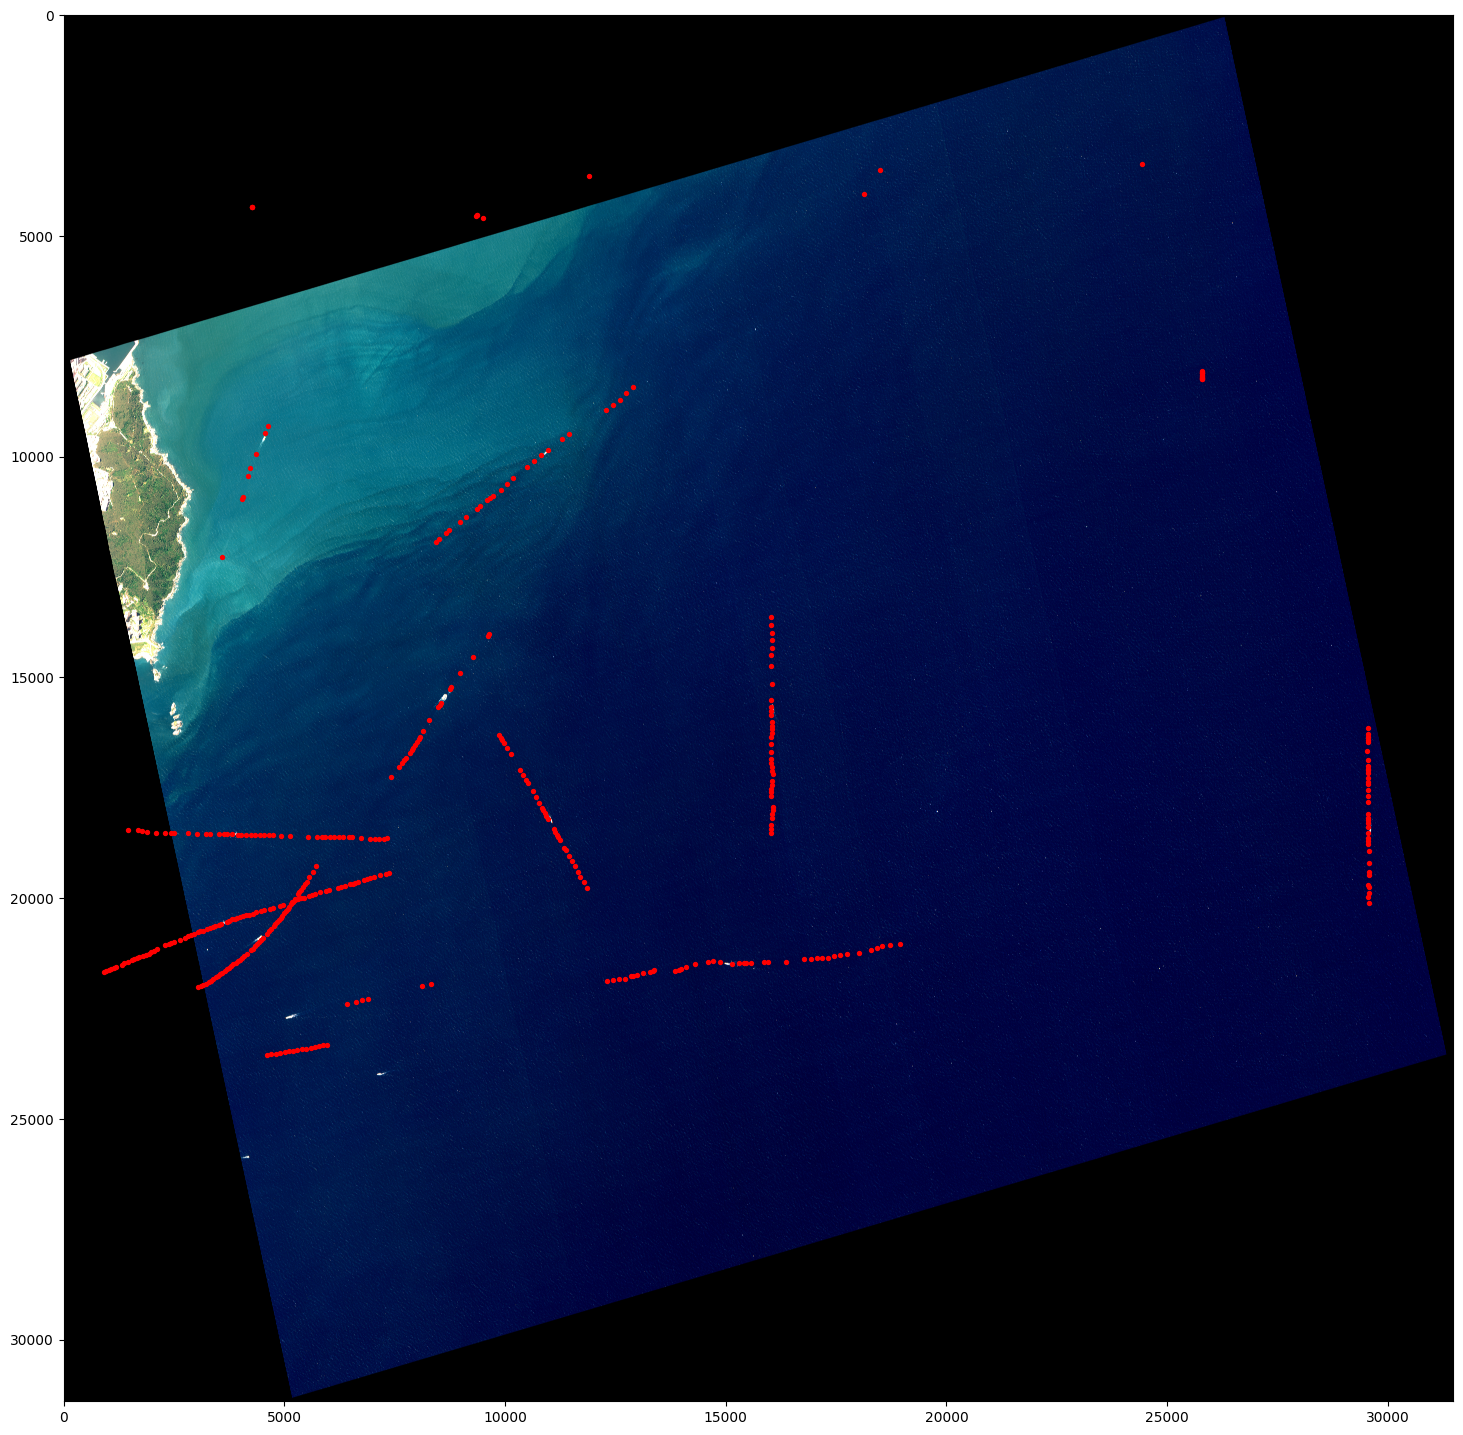

In [33]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

#plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [49]:
args.map_path
os.path.exists(args.map_path)

True

------------------- Eric Edited 


<Axes: >

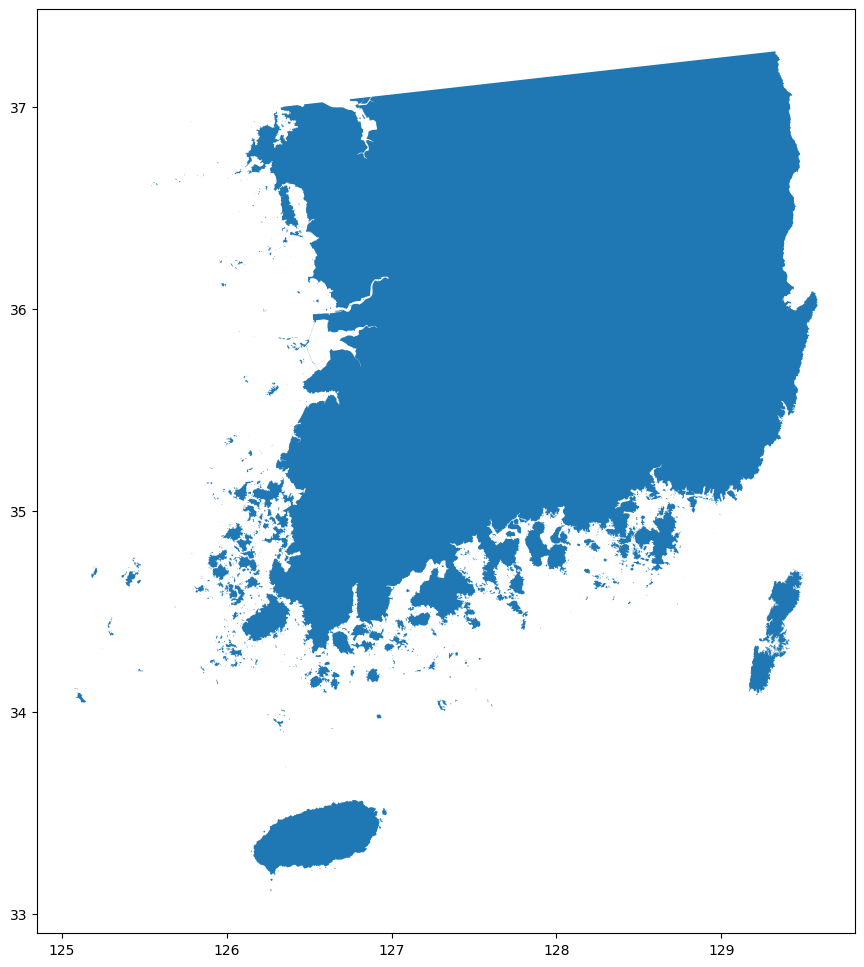

In [50]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [51]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  53
progress :  1  /  53
progress :  2  /  53
progress :  3  /  53
progress :  4  /  53
progress :  5  /  53
progress :  6  /  53
progress :  7  /  53
progress :  8  /  53
progress :  9  /  53
progress :  10  /  53
progress :  11  /  53
progress :  12  /  53
progress :  13  /  53
progress :  14  /  53
progress :  15  /  53
progress :  16  /  53
progress :  17  /  53
progress :  18  /  53
progress :  19  /  53
progress :  20  /  53
progress :  21  /  53
progress :  22  /  53
progress :  23  /  53
progress :  24  /  53
progress :  25  /  53
progress :  26  /  53
progress :  27  /  53
progress :  28  /  53
progress :  29  /  53
progress :  30  /  53
progress :  31  /  53
progress :  32  /  53
progress :  33  /  53
progress :  34  /  53
progress :  35  /  53
progress :  36  /  53
progress :  37  /  53
progress :  38  /  53
progress :  39  /  53
progress :  40  /  53
progress :  41  /  53
progress :  42  /  53
progress :  43  /  53
progress :  44  /  53
progress :  45  /  5

In [52]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0           0   3599.890137  20581.031250  186.868088    35.925919   
1           4   3849.363281  18558.515625  199.199326    44.064297   
2           5  25813.296875   8092.152832   51.718273    16.984535   
3           7  16050.261719  15691.180664  149.506973    39.538895   
4           8  11025.121094  18231.333984  164.990036    30.775673   
5          12   4535.546875   9589.789062  104.751633    42.211746   
6          13   8613.365234  15437.510742  131.055817    61.008537   
7          16   4796.750977  20622.435547   65.941231    49.533623   
8          18  15027.531250  21501.246094  147.792603    37.972275   
9          23   3794.391357  18602.357422   37.036858    15.437199   
10         24  10939.438477   9890.346680   98.126892    46.959858   
11         29   4758.479980  20664.568359   28.269051    17.089632   
12         30   4437.677734  20909.414062  121.050888    52.460583   
13         38   8635.338867  15492.907227  158.386230    31.844809   
14         43   7281.983887  18777.480469   19.541071     8.198781   
15         45   8788.069336  15249.392578   64.587990    41.997314   
16         50   3772.684814  18627.439453   25.063793     9.207772   
17         51  11058.190430  18293.779297   31.518036    12.404265   
18          1    957.206848   7882.529297   63.180214    30.966908   
19          2   5125.469238  22699.511719  218.620590    44.966572   
20          3   2538.330811  15889.689453  136.474411    42.357159   
21          6   2457.363281  15714.741211  261.895325    61.309444   
22          9   2506.279297  15625.635742  111.407532    22.566284   
23         10    851.878540   9050.205078   29.745382    10.947246   
24         11   7123.760254  23996.748047   81.333527    39.808208   
25         14   2562.873291  16244.245117  159.355682   119.058075   
26         15    869.345886   8610.242188   25.667536    14.866991   
27         17  11045.660156  19186.867188   20.086212     9.113806   
28         19   2564.071533  16114.167969  234.781815   120.448921   
29         20   3640.857666  12764.192383   19.296715     9.657768   
30         21   1232.230225   8001.824707  225.113892    49.047253   
31         22   2191.466797  13751.342773  140.065765    43.292747   
32         25   1150.466309   8081.617188   74.094162    32.553936   
33         26  30755.068359  21986.183594   32.202103    14.630180   
34         27   7570.392090  18409.802734   20.978483    15.048300   
35         28   1930.701660   8851.039062   60.358780    33.516510   
36         31   7999.868164  23536.931641   21.986746    10.999839   
37         32   2395.271973  13218.625000  158.420273    31.003204   
38         33   2042.590088  14649.841797  181.947708    55.846073   
39         34   1834.289062   9010.229492  509.196472   108.826469   
40         35   6452.842285  19019.320312   17.531755     9.018176   
41         36   2729.442627  12005.116211   24.776529    16.721533   
42         37   2072.733154  14951.973633  284.956268    96.638573   
43         39   2705.970947  12039.060547   53.118629    18.691916   
44         40   1560.483398   7575.644531  344.069366    70.555466   
45         41   2736.922363  11140.132812   54.754711    48.469379   
46         42  26461.429688   4710.584473   28.415146    15.081006   
47         44   4133.470215  25877.853516  122.915024    44.661510   
48         46   8881.569336  12331.822266   32.194023    13.785784   
49         47   2476.537842  16050.841797  106.402397    44.255993   
50         48   2910.537842  10758.715820   62.821312    26.543133   
51         49  22888.941406  13775.865234   42.968163    15.390750   
52         52   2643.156982  12471.237305  391.207336    87.641357   

    bbox angle  bbox prob         mmsi  heading   turn  speed  \
0    -0.388373   0.977201  440152550.0    511.0 -128.0   12.2   
1    -0.229128   0.892713  441300000.0    266.0    0.0   10.8   
2     1.255820   0.872636  4

In [53]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

/tmp/ipykernel_3991794/3046557337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_masked['box index'] = [i for i in range(len(M_masked))]


bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0    3599.890137  20581.031250  186.868088    35.925919   -0.388373   
1    3849.363281  18558.515625  199.199326    44.064297   -0.229128   
2   25813.296875   8092.152832   51.718273    16.984535    1.255820   
3   16050.261719  15691.180664  149.506973    39.538895    1.382657   
4   11025.121094  18231.333984  164.990036    30.775673    1.037709   
5    4535.546875   9589.789062  104.751633    42.211746   -1.274804   
6    8613.365234  15437.510742  131.055817    61.008537   -1.198541   
7    4796.750977  20622.435547   65.941231    49.533623    0.059039   
8   15027.531250  21501.246094  147.792603    37.972275    0.308788   
9    3794.391357  18602.357422   37.036858    15.437199    0.378652   
10  10939.438477   9890.346680   98.126892    46.959858   -0.385814   
11   4758.479980  20664.568359   28.269051    17.089632   -0.453225   
12   4437.677734  20909.414062  121.050888    52.460583   -0.371202   
13   8635.338867  15492.907227  158.386230    31.844809   -1.072713   
14   7281.983887  18777.480469   19.541071     8.198781    0.306752   
15   8788.069336  15249.392578   64.587990    41.997314   -1.540057   
16   3772.684814  18627.439453   25.063793     9.207772   -0.024613   
17  11058.190430  18293.779297   31.518036    12.404265    1.497077   
18    957.206848   7882.529297   63.180214    30.966908   -0.849319   
19   5125.469238  22699.511719  218.620590    44.966572   -0.300918   
20   7123.760254  23996.748047   81.333527    39.808208   -0.120895   
21  11045.660156  19186.867188   20.086212     9.113806   -0.066008   
22   3640.857666  12764.192383   19.296715     9.657768    0.326311   
23  30755.068359  21986.183594   32.202103    14.630180    0.956514   
24   7570.392090  18409.802734   20.978483    15.048300   -1.325738   
25   1930.701660   8851.039062   60.358780    33.516510    0.694592   
26   7999.868164  23536.931641   21.986746    10.999839   -1.213000   
27   6452.842285  19019.320312   17.531755     9.018176    0.051957   
28   1560.483398   7575.644531  344.069366    70.555466   -0.963638   
29  26461.429688   4710.584473   28.415146    15.081006    0.670247   
30   4133.470215  25877.853516  122.915024    44.661510   -0.030072   
31   8881.569336  12331.822266   32.194023    13.785784    0.634975   
32  22888.941406  13775.865234   42.968163    15.390750    0.833223   

    bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0    0.977201  440152550.0    511.0 -128.0   12.2                3751   
1    0.892713  441300000.0    266.0    0.0   10.8                4008   
2    0.872636  440116360.0    511.0 -128.0    1.2               25786   
3    0.856848  440132230.0    511.0 -128.0    8.8               16033   
4    0.835272  440019260.0    511.0 -128.0    7.1               10904   
5    0.752831  440055170.0     24.0 -128.0    9.3                4567   
6    0.719736  440101460.0    511.0 -128.0    7.1                8524   
7    0.609423  440104360.0    511.0 -128.0    6.7                4601   
8    0.549905  440111830.0    511.0 -128.0   13.3               15139   
9    0.437149  441300000.0    266.0    0.0   10.8                3947   
10   0.435000  440130640.0    511.0 -128.0   10.6               10821   
11   0.367788  440104360.0    511.0 -128.0    6.7                4601   
12   0.364435  440104360.0    511.0 -128.0    6.7                4340   
13   0.311604  440101460.0    511.0 -128.0    7.8                8482   
14   0.295466  441300000.0    259.0    0.0   10.5                7326   
15   0.286051  440101460.0    511.0 -128.0    7.0                8748   
16   0.236452  441300000.0    266.0    0.0   10.8                3947   
17   0.234160  440019260.0    511.0 -128.0    7.8               10938   
18   0.960683          NaN      NaN    NaN    NaN                   0   
19   0.925099          NaN      NaN    NaN    NaN                   0   
20   0.770197          NaN      NaN    NaN    NaN       

# Masked Visualization

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (988472000 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


#-------------- 0.0303
#-------------- 0.0606
#-------------- 0.0909
#-------------- 0.1212
#-------------- 0.1515
#-------------- 0.1818
#-------------- 0.2121
#-------------- 0.2424
#-------------- 0.2727
#-------------- 0.3030
#-------------- 0.3333
#-------------- 0.3636
#-------------- 0.3939
#-------------- 0.4242
#-------------- 0.4545
#-------------- 0.4848
#-------------- 0.5152
#-------------- 0.5455
#-------------- 0.5758
#-------------- 0.6061
#-------------- 0.6364
#-------------- 0.6667
#-------------- 0.6970
#-------------- 0.7273
#-------------- 0.7576
#-------------- 0.7879
#-------------- 0.8182
#-------------- 0.8485
#-------------- 0.8788
#-------------- 0.9091
#-------------- 0.9394
#-------------- 0.9697
#-------------- 1.0000


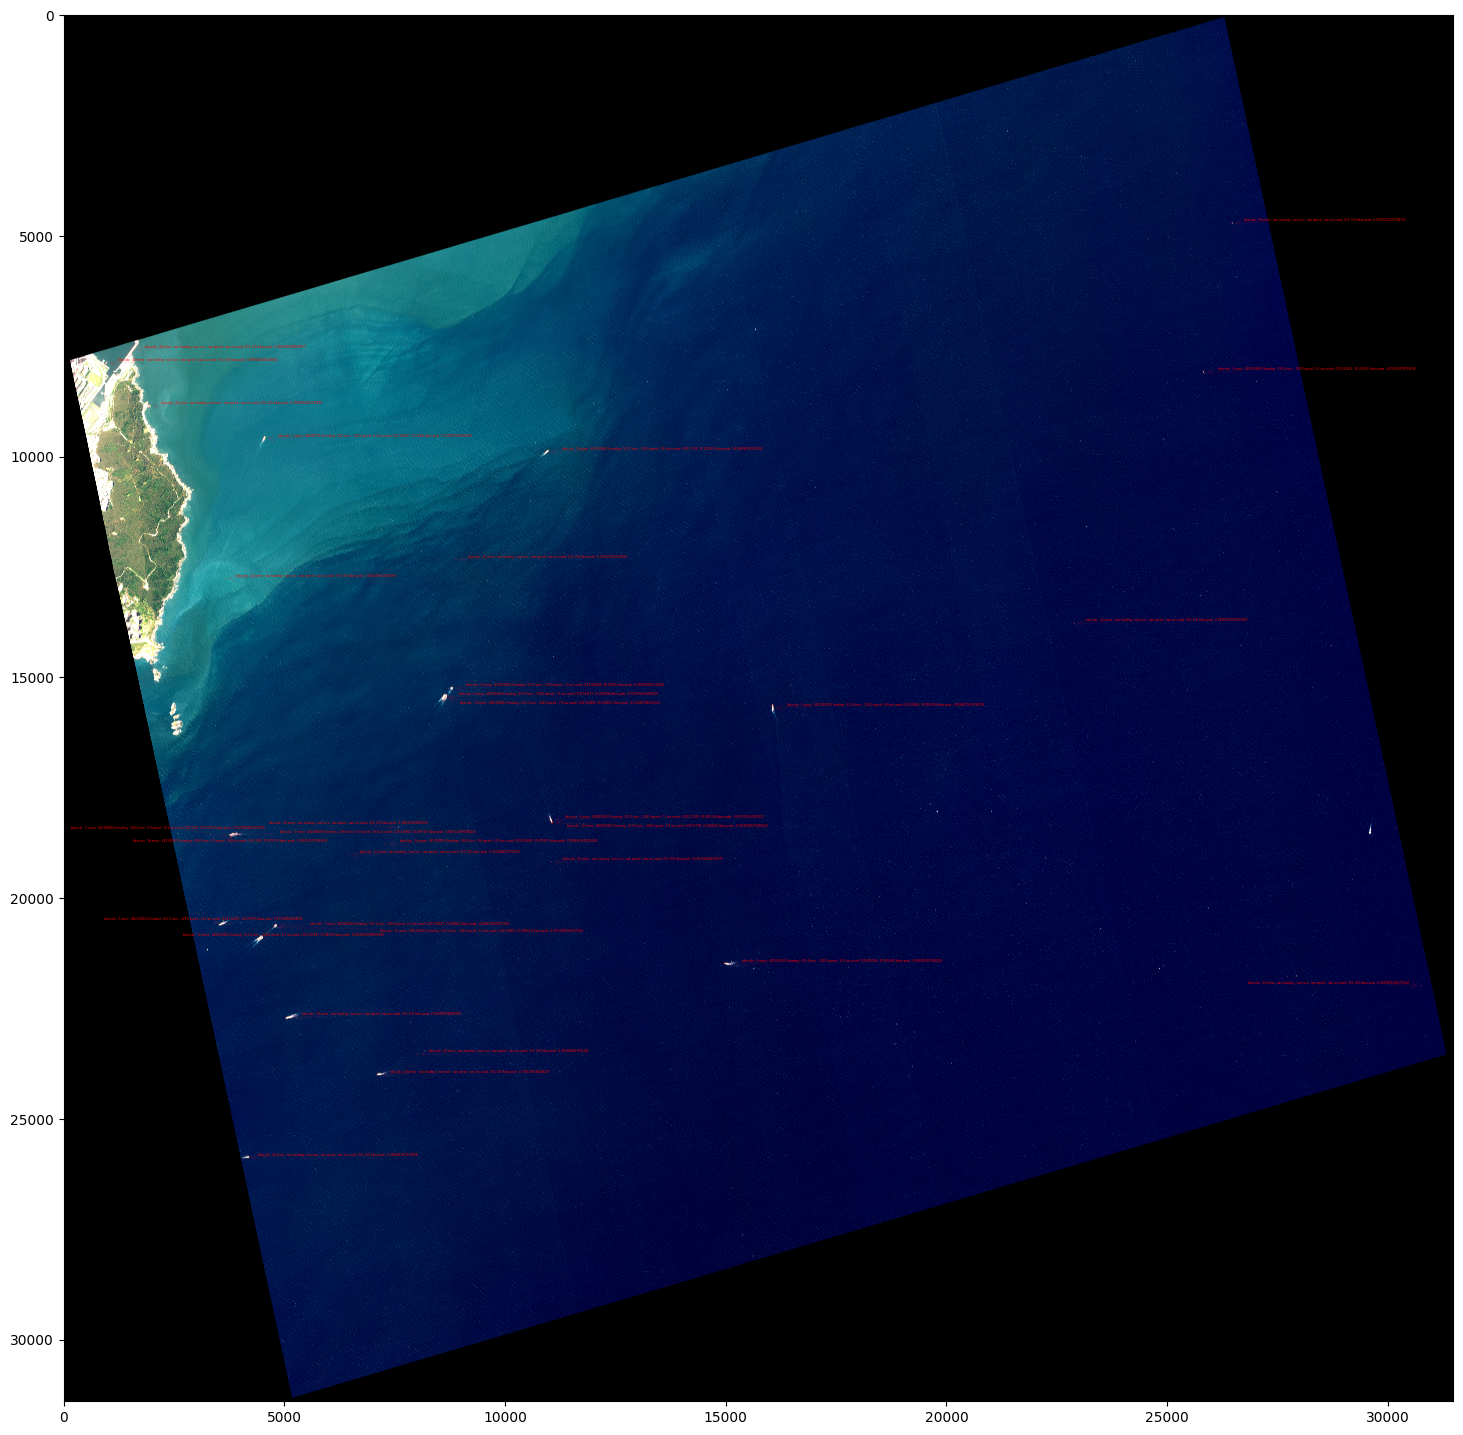

In [54]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0

# Label
plt_txts = []

# M_masked
for i,row in M_masked.iterrows():
    box_idx = row['box index']
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    prob_ = row['bbox prob']

    mmsi_ = row['mmsi']
    heading_ = row['heading']
    turn_ = row['turn']
    speed_ = row['speed']
    lat_ = row['ais lat']
    lon_ = row['ais long']

    
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

    # if (lat_ ==0) & (lon_ ==0):
    #     pass
    # else:
    name = f'bbox idx : {box_idx} mmsi : {mmsi_} heading : {heading_} turn : {turn_} speed : {speed_} ais coord: {lon_,lat_} bbox prob : {prob_}'
    plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


adjust_text(plt_txts, 
            force_points=3,
            arrowprops={'arrowstyle' : '->', 
                        'color' : 'crimson',  
                        'alpha' : 0.1}
            )
#------------------------------------

plt.imshow(img_)
#plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()
#------------------------------------

# Extract Chips

In [55]:
# #----- load 
# img_path = args.img_path
# M_chip = pd.read_csv(args.csv_output_masked)

# img_part = Image.open(img_path)
# prefix_ = args.img_path.split("/")[-1].replace(".png","")

# a= os.path.dirname(args.img_path)
# chip_folder = os.path.join(a,"chips")

# if os.path.exists(chip_folder):
#     print("folder exists")
# else:
#     os.mkdir(chip_folder)
#     print("folder created")

In [56]:
#M_chip

In [57]:
#prefix_

In [58]:

# print("#--------------------",len(M_))
# for i,row in M_chip.iterrows():

#     if row["ais time"] != str(0):
#         print({i})
#         box_ = row
#         x = box_["bbox x coord"]
#         y = box_["bbox y coord"]
#         width =  box_["bbox width"]
#         height = box_["bbox height"]
#         angle_ = box_["bbox angle"]
#         box_idx = box_['box index']

#         pixel_slice = 512
#         a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
#         #plt.figure(figsize=(18,18))
        
#         folder_ = chip_folder
#         saved_name = f"{box_idx}_{prefix_}.png"
        
        
#         #plt.figure(figsize=(18,18))
#         #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
#         a_.save(os.path.join(folder_,saved_name))
#         plt.imshow(a_)
    

In [59]:
# import subprocess


# zip_command = ["zip", "-jr","chips_v2.zip", folder_]

# try:    
#     subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
#     print("Zip operation successful.")
# except subprocess.CalledProcessError as e:
#     print(f"Error during zip operation: {e}")